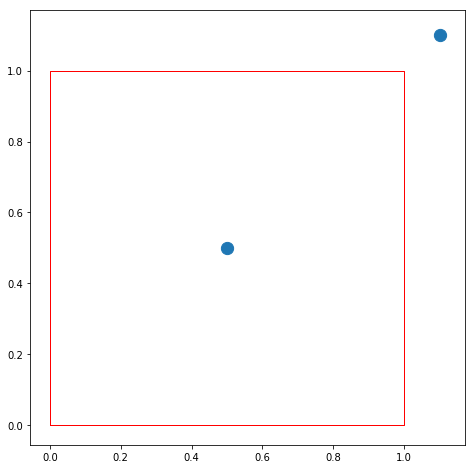

In [3]:
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point, Polygon

Square = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])

Point_A = Point(1.1, 1.1)
Point_B = Point(0.5, 0.5)

points = gpd.GeoDataFrame(geometry=[ Point_A, Point_B], index=['A', 'B'])
polygon = gpd.GeoDataFrame(geometry=[Square], index=['P'])

base = polygon.plot(color='white', edgecolor='red', figsize=(15,8))
points.plot(ax=base, markersize=150)

In [10]:
points.loc['B'].geometry.within(polygon.iloc[0].geometry)

True

In [11]:
polygon.iloc[0].geometry.contains(points.loc['A'].geometry)

False

In [12]:
points.distance(points.loc['A'].geometry).iloc[0]

0.0

In [13]:
points.distance(points.loc['B'].geometry).loc['B']

0.0

In [15]:
polygon['geometry'].apply(lambda x: points.distance(x))['B'].iloc[0]

0.0

# Distância de um ponto a um polígono

In [27]:
import geopandas as gpd

estado_rj = gpd.read_file('../01.Dados/Mapas/RJ/33MUE250GC_SIR.shp')
estado_rj = estado_rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

rj = estado_rj[estado_rj['NM_MUNICIP'] == 'RIO DE JANEIRO']

rj['Munic_Longe'] = rj['geometry'].apply(lambda x: estado_rj['NM_MUNICIP'].iloc[ estado_rj.distance(x).idxmax() ])
rj['Dist_Max'] = rj['geometry'].apply(lambda x: "{0:.2f} km".format(estado_rj.distance(x).max()))

rj[['Munic_Longe', 'Dist_Max']]

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Munic_Longe,Dist_Max
67,VARRE-SAI,233.23 km
